In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the caret_analyze package before using it.
# The source code used for the measurement can be found here:
# https://github.com/tier4/CARET_demos

In [2]:
import os
import sys

home = os.path.expanduser('~')
sys.path.append(home + '/ros2_caret_ws/build/caret_analyze')
sys.path.append(home + '/ros2_caret_ws/install/caret_analyze_cpp_impl/lib/python3.8/site-packages')
# or execute soruce command before running jupyter.
# source ~/ros2_caret_ws/install/local_setup.bash


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
import caret_analyze as caret
import caret_analyze.plot as caret_plot

Succeed to find record_cpp_impl. the C++ version will be used.


In [5]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [6]:
trace_dir_path = './talker_listener/'
lttng = caret.Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./talker_listener/converted
converting trace directory: ./talker_listener
converted 304 events in 53 ms
output written to: ./talker_listener/converted
 [100%] [Ros2Handler]


In [7]:
arch = caret.Architecture()
architecture_path = './talker_listener/architecture.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [8]:
app = caret.Application(arch)

In [9]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /listener
callback_type: subscription_callback
subscription topic name :/chatter
callback_name: subscription_callback_0
callback symbol: demo_nodes_cpp::Listener::Listener(rclcpp::NodeOptionsconst&)::{lambda(std::shared_ptr<std_msgs::msg::String>)#1}
callback unique name: /listener/subscription_callback_0


In [10]:
start_callback_unique_name = app.callbacks[1].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /talker/timer_callback_0
end_callback: /listener/subscription_callback_0


In [11]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [12]:
path = paths[0]

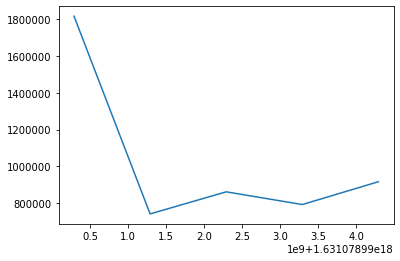

In [13]:
t, latency = path.to_timeseries()
plt.plot(t, latency)

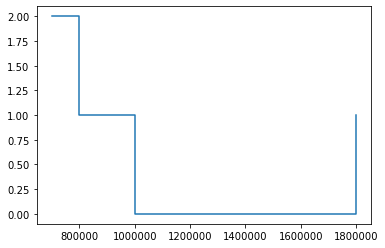

In [14]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [15]:
df = path.to_dataframe()
df

,/talker/timer_callback_0/callback_start_timestamp/0,/talker/timer_callback_0/callback_end_timestamp/0,/talker/timer_callback_0/rclcpp_publish_timestamp/0,/talker/timer_callback_0/rcl_publish_timestamp/0,/talker/timer_callback_0/dds_write_timestamp/0,/listener/subscription_callback_0/on_data_available_timestamp/0,/listener/subscription_callback_0/callback_start_timestamp/0,/listener/subscription_callback_0/callback_end_timestamp/0
0,1631078990288672218,1631078990289455570,1631078990289280521,1631078990289285974,1631078990289288278,1631078990289522219,1631078990290029433,1631078990290489184
1,1631078991288504289,1631078991288833864,1631078991288704199,1631078991288706584,1631078991288708358,1631078991288905821,1631078991289088197,1631078991289245927
2,1631078992288552728,1631078992288939076,1631078992288808701,1631078992288811360,1631078992288813307,1631078992289011165,1631078992289240824,1631078992289414557
3,1631078993288516650,1631078993288851544,1631078993288721394,1631078993288723922,1631078993288725659,1631078993288932110,1631078993289141210,1631078993289309262
4,1631078994288567220,1631078994288948699,1631078994288800056,1631078994288802458,1631078994288804095,1631078994289027475,1631078994289306007,1631078994289483961


In [16]:
caret_plot.message_flow(path, granularity='callback')

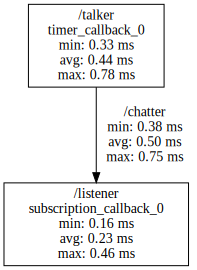

In [17]:
caret_plot.path_latency(path, granularity='callback')